# Multiple Linear Regression & Polynomial Regression

Dalam sesi pembelajarn kali ini, kita akan bersama-sama mempelajari dua model regression yaitu "Multiple Linear Regression" dan "Polynomial Regression".

Keduaanya merupakan pengembangan dari "Simple Linear Regression" yang pernah kita pelajari pada sesi sebelumnya.

# Sample Dataset

Pertama-tama, kita akan menyiapkan terlebih dahulu dataset yang akan kita gunakan dalam sesi pembelajaran kali ini. Disini kita akan kembali memanfaatkan dataset "pizza", hanya saja disini kita akan menyertakan kolom baru yaitu "jumlah topping" atau "n topping". 

Dataset yang akan kita bentuk kali ini berisi daftar ukuran "diameter" atau diameter, "n_topping" atau jumlah topping, dan 'harga' atau harga dari sejumlah pizza yang akan kita tampung kedalam  format pandas DataFrame. Kali ini kita akan langsung persiapkan baik training dataset dan testing datasetnya.

# Training Set

In [20]:
# Code 01

import pandas as pd

pizza = {'diameter': [6, 8, 10, 14, 18], 
         'n_topping': [2, 1, 0, 2, 0],
         'harga': [7, 9, 13, 17.5, 18]}

train_pizza_df = pd.DataFrame(pizza)
train_pizza_df

,diameter,n_topping,harga
0,6,2,7.0
1,8,1,9.0
2,10,0,13.0
3,14,2,17.5
4,18,0,18.0


Alur berpikir code 01 :
- Pertama-tama kita akan mengimport mondul pandas yaitu "import pandas as pd" karena kita akan membentuk dataset dalam format pandas DataFrame.
- Lalu berikutnya, kita akan menyiapkan dataset kita. Dataset kita kali ini awalnya dibentuk dari suatu dictionary, yang terdiri dari tiga buah key yaitu "diameter", "n_toping", dan "harga".
- Setiap key tersebut akan menampung list yang berisi sekumpulan bilangan yang berasosiasi dengan setiap keys tersebut.
- Lalu selanjutnya dictionary tersebut akan kita tampung ke dalam variabe "pizza".
- Untuk selanjutnya, dictionary ini akan kita gunakan sebagai base atau sebagai basis untuk membuat pandas DataFrame.
- Lalu selanjutnya kita panggil "pd.DataFrame(pizza)", artinya disini kita akan membentuk suatu pandas DataFrame dari data-data yang tersimpan dalam variabel pizza tersebut.
- Selanjutnnya DataFrame yang terbentuk ini akan kita tampung kedalam variabel "train_pizza_df".
- Lalu terakhir, kita akan mencoba tampilkan ke layar.

# Testing Set

Selanjutnya kita juga akan menggunakan teknik yang sama untuk mempersiapkan testing dataset kita.
.
Disini tahapannya sama persis, hanya saja datanya berbeda (perhatikan pada code 02 dan 01 kembali).

In [21]:
# Code 02

pizza = {'diameter': [8, 9, 11, 16, 12], 
         'n_topping': [2, 0, 2, 2, 0],
         'harga': [11, 8.5, 15, 18, 11]}

test_pizza_df = pd.DataFrame(pizza)
test_pizza_df

,diameter,n_topping,harga
0,8,2,11.0
1,9,0,8.5
2,11,2,15.0
3,16,2,18.0
4,12,0,11.0


Kedua dataset tersebut (code 01 dan code 02) sama-sama terdiri dari tiga buah kolom yaitu kolom "diameter", "n_topping", dan "harga". 

Dalam sesi pembelajaran kali ini kita akan membentuk suatu model machine learning sederhana yang dapat digunakan untuk memprediksi harga pizza berdasarkan ukuran diameter dan jumlah toppingnya. Dengan kata lain, disini data diameter dan jumlah topping atau "n_topping" akan berperan sebagai features, sedangkan harga pizza atau "harga" akan berperan sebagai target. Karena disini akan diprediksi berupa nilai continous dan bukan kategori, maka kasus tersebut masuk kedalam "Regression Task".

# Preprocessing Dataset

Sebelum kita melangkah kepada proses training model, kita akan kelompokan terlebih dahulu sekumpulan nilai features dan nilai target dari sekumpulan dataset yang kita miliki.

In [22]:
# Code 03 (Testing Set)

import numpy as np

X_train = np.array(train_pizza_df[['diameter', 'n_topping']])
y_train = np.array(train_pizza_df['harga'])

print(f'X_train:\n{X_train}\n')
print(f'y_train: {y_train}')

X_train:
[[ 6  2]
 [ 8  1]
 [10  0]
 [14  2]
 [18  0]]

y_train: [ 7.   9.  13.  17.5 18. ]


Alur berpikir code 03 :
- Pertama, kita import terlebih dahulu "numpy as np"
- Untuk kasus kita kali ini, diamter dan jumlah topping akan kita konversikan kedalam numpy array.
- Lalu kemudian kita tampung kedalam variabel "X_train" sebagai sekumpulan features untuk training set.
- Lalu untuk harga pizza, kita juga akan mengkonversikan menjadi numpy array untuk selanjutnya kita tampung kedalam variabel "y_train" sebagai skumpulan nilai target untuk training set.
- Proses serupa juga kita akan terapkan pada testing setnya (code 04).

Jika kita melihat output code 03, seperti biasa "X_train" selalu berada dalam format array 2 dimensi, sedangkan "y_train" akan selalu berada dalam format array satu dimensi.

In [23]:
# Code 04 (Training Set)

X_test = np.array(test_pizza_df[['diameter', 'n_topping']])
y_test = np.array(test_pizza_df['harga'])

print(f'X_test:\n{X_test}\n')
print(f'y_test: {y_test}')

X_test:
[[ 8  2]
 [ 9  0]
 [11  2]
 [16  2]
 [12  0]]

y_test: [11.   8.5 15.  18.  11. ]


Pada hasil output code 04 diatas tersebut merupakan testing set yang kita miliki baik untuk features maupun targetnya.

# Multiple Linear Regression

Setelah kita memahami konteks dataset dan permasalahannya, kita akan mencoba menerapkan "Multiple Linear Regression" untuk kasus kita kali ini.

Multiple Linear Regression merupakan generalisasi dari Simple Linear Regression yang memungkinkan untuk menggunakan beberapa explanatory variables.

Jadi sebenarnya, perbedaan dasar antar "Simple Linear Regression" dan "Multiple Linear Regression" terletak pada jumlah features atau explanatory variable yang digunakan. Pada "Simple Linear Regression" kita hanya menggunakan satu feature saja untuk melakukan prediksi nilai, sedangkan pada "Multiple Linear Regression" kita akan menggunakan lebih dari satu features untuk melakukan prediksi.

# Formula

$y = \alpha + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n$

- Jika kita perhatikan pada formula atau rumus tersebut, disana terdapat lebih dari satu nilai x, yaitu ada x1, x2, sampai dengan xn. 
- Dengan kata lain, jumlah x atau jumlah features ini bisa lebih dari satu. 
- Yang perlu diperhatikan disini ialah untuk setiap nilai $x$ nya akan dikalikan dengan $\beta$.
- Berarti jika kita memiliki $x1$, maka $x1$ tersebut akan dikalikan dengan $\beta1$.
- Dan jika kita memiliki $x2$, maka nilai $x2$ akan dikalikan dengan $\beta2$

Referensi: https://en.wikipedia.org/wiki/Linear_regression

In [24]:
# Code 05

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
    
print(f'r_squared: {r2_score(y_test, y_pred)}')

r_squared: 0.7701677731318468


Alur berpikir code 05 :
- Pertama-tama kita akan mengimport terlebih dahulu modulnya "from sklearn.linear_model import LinearRegression".
- Lalu selanjutnya, kita akan mengimport juga untuk matrix nya dengan memanggil fungsi "from sklearn.metrics import r2_score".
- Lalu tahapan berikutnya, kita akan membentuk objek modelnya dengan memanggil fungsi "LinearRegression()", lalu kita tampung kedalam variabel "model".
- Lalu berikutnya, kita akan melakukan proses training model kita dengan memanggil fungsi "model.fit" dengan menyertakan parameter "(X_train, y_train)".
- Setelah modelnya kita training, model tersebut akan kita gunakan untuk melakukan prediksi. Disini kita akan menggunakan train model kita untuk melakukan prediksi terhadap feature yang terdapat dalam testing set kita. Oleh karenanya, kita akan memanggil fungsi "y_pred = model.predict(X_test)" yang akan kita tampung kedalam variabel "y_pred".
- Untuk selanjutnya model prediksi ini akan kita gunakan untuk mengukur peforma dari model kita.
- Dalam kasus kita kali ini, kita akan gunakan r2_score sebagai pengukuran peformanya.
- Langkah terakhir, kita akan tampilkan nilai-nilai tersebut.

Jika kita perhatikan pada code 05 tersebut, bahwa pada SkLearn sebenarnya tidak ada perbedaan antara implementasi "Simple Linear Regression" dan "Multiple Linear Regression". Yang berbeda hanyalah pada jumlah feature yang dilewatkannya saja.

# Polynomial Regression

Selanjutnya kita akan mempelajari bentuk pengembangan lain dari bentuk "Simple Linear Regression" yaitu "Polynomial Regression".

Polynomial Regression memodelkan hubungan antara independent variable $x$ dan dependent variable $y$ sebagai derajat polynomial dalam $x$.
- Independent variable $x$ sebenarnya merupakan features.
- Dependent variable $x$ sebenarnya merupakan target.

Referensi: https://en.wikipedia.org/wiki/Polynomial_regression

# Preprocessing Dataset

Disini untuk menyederhanakan proses belajar, kita akan memangkas jumlah feature nya menjadi satu feature saja.

In [25]:
# Code 06

X_train = np.array(train_pizza_df['diameter']).reshape(-1, 1)
y_train = np.array(train_pizza_df['harga'])

print(f'X_train:\n{X_train}\n')
print(f'y_train: {y_train}')

X_train:
[[ 6]
 [ 8]
 [10]
 [14]
 [18]]

y_train: [ 7.   9.  13.  17.5 18. ]


Alur berpikir code 06 :
- Disini feturesnya akan kita pangkas menjadi satu feature yang dalam kasus ini yang dijadikan feature adalah "diameter" atau diameter pizzanya, tetapi targetnya prediction nya tetap sama yaitu harga pizza.
- Kita akan siapkansuatu numpy array "(train_pizza_df['diameter'])" karena kita hanya mau mengambil kolom diameter saja.
- Lalu berikutnya, kita perlu melkaukan proses reshaping atau reshape yang dalam kasus ini (-1, 1) karena pada SkLearn untuk featuresnya itu harus berada dalam array 2 dimensi, sedangkan disini kita hanya memiliki satu kolom saja sebagai featuresnya. 
- Aritinya fetures yang terdiri dari satu varibel tersebut, perlu kita transformasikan kedalam array dua dimensi dengan memanfaatkan method reshape (-1, 1) lalu kita tampung kedalam variabel "X_train".
- Selanjutnya kita akan membentuk array yang kedua yang akan menampung nilai target dengan memanggil "np.array(train_pizza_df['harga'])" karena kolom harga tersebut akan kita gunakan sebagai target prediksinya yang akan kita tampung kedalam variabel "y_train".
- Langkah akhir, kita akan mencoba cetak ke layar baik nilai 'X_train" dan juga "y_train" nya.

Bisa kita lihat pada code 06. Walaupun nilai "X_train" nya terdiri dari satu features saja, tetapi array yang terbentuk ini tetap dalam format array 2 dimensi. Hal ini dimungkinkan karena kita memanggil method "reshape(-1, 1)".    


# Polynomial Regression : Quadratic

Disini kita akan mempelajari "Polynomial Regression Quadratic" pada SkLearn dengan derajat polynomial 2 atau biasa dikenal dengan istilah "Quadratic". Selain mderajat polynomial 2, kita juga bisa menggunakan polynomial lainnya seperti 3, 4, dan seterusnya. Hanya saja, yang paling umum ditemui adalah derajat polynomial 2 dengan 3 atau dikenal dengan "Quadratic" dan "Cubic".

# Formula

$ y = \alpha + \beta_1x + \beta_2x^2$

- Jika kita perhatikan pada formula tersebut, nilai feature nya hanya ada satu yaitu x.
- Hanya saja nilai feature yang tunggal tersebut akan kita representasikan dalam format polynomial.
- Untuk kasus kita kali ini, kita akan menggunakna polynomial derajat 2 yang berarti kita akan memiliki $x^1$ dan $x^2$.
- Untuk $x^1$ akan dikalikan dengan $\beta^1$ dan untuk $x^2$ akan kita kalikan dengan $\beta^2$.

# Polynomial Features

Untuk menerapkan polynomial regression, pertama-tama kita perlu melakukan transformasi terhadap feature dari datset yang kita miliki.

In [26]:
# Code 07

from sklearn.preprocessing import PolynomialFeatures

quadratic_feature = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic_feature.fit_transform(X_train)

print(f'X_train_quadratic:\n{X_train_quadratic}\n')

X_train_quadratic:
[[  1.   6.  36.]
 [  1.   8.  64.]
 [  1.  10. 100.]
 [  1.  14. 196.]
 [  1.  18. 324.]]



Alur berpikir code 07 :
- Pertama-tama, kita akan mengimport modulnya terlebih dahulu dengan memanggil "from sklearn.preprocessing import PolynomialFeatures".
- Lalu berikutnya, kita akan membentuk objek polynomial fetures nya dengan memanggil "PolynomialFeatures" dengan menyertakan parameter "(degree=2)" atau derjat polynomialnya yang dalam kasus ini nilainya adalah 2. Karena dalam kasus kita kali ini kita akan membentuk "Quadratic Polynomial Regression", maka degree nya kita beri nilai 2 lalu kita tampung kedalam variabel "quadratic_feature".
- Objek tersebut akan kita gunakan untuk melakukan proses transformasi terhadap dataset feature yang kita miliki. Oleh karena itu, kita memanggil "quadratic_feature.fit_transform" dengan menyertakan parameter "X_train". Lalu hasil transformasinya, akan kita tampung ke dalam variabel "X_train_quadratic". 
- Variabel "X_train_quadratic" akan berisi features dari training set kita yang sudah ditransformasikan kedalam "Polynomial Features".
- Langkah akhir, kita akan coba untuk tampilkan hasilnya.

Bisa kita lihat pada output code 07, bahwa nilai feature yang tunggal tadi sekarang menjadi 3. Kita sama-sama mengetahui bahwa nilai pada indeks pertama adalah 6, tetapi mengapa sekarang bisa menjadi 1, 6, 36 (lihat pada output code 07). Nilai 1 diperoleh dari nilai x dipangkatkan 0 yang kita ketahui hasilnya adalah 1, nilai 2 diperoleh dari 6 dipangkatkan 1 adalah 6, lalu 6 dipangkatkan 2 adalah 36 dan seterusnya.

# Training Model

Setelah kita memiliki polynomial features yang dibutuhkan, selanjutnya kita memulai melakukan training model.

In [27]:
# Code 08

model = LinearRegression()
model.fit(X_train_quadratic, y_train)

LinearRegression()

Alur berpikir code 08 :
- Pertama-tama, kita akan bentuk terlebih dahulu objek modelnya dengan memanggil "LinearRegression()" yang kita tampung kedalam variabel model.
- Untuk selanjutnya, objek model ini akan kita training dengan memanfaatkan nilai fetures yang sudah kita transformasikan kedalam polynomial dengan memanggil "(X_train_quadratic, y_train)". Perlu diperhatikan bahwa proses transformasi polynomialnya dikenakan pada features dan tidak dikenakan pada target.
- Bisa kita lihat pada hasil code tersebut bahwa tidak ada perbedaan antar implementasi linear regression dan polynomial regression. Yang berbeda hanyalah pada polynomial regression kita perlu melakukan transformasi features kedalam polynomial features sebelum mealkukan proses training model.

# Visualisasi Model

Selanjutnya untuk memberikan gambaran yang lebih baik terkait qudratic polynomial regression ini, kita akan mencoba untuk memvisualisasikan modelnya.

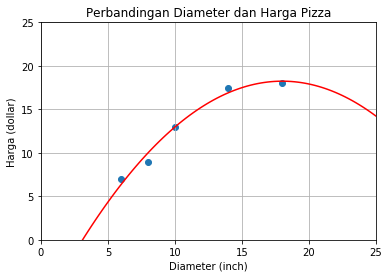

In [28]:
# Code 09

import matplotlib.pyplot as plt

X_vis = np.linspace(0, 25, 100).reshape(-1, 1)
X_vis_quadratic = quadratic_feature.transform(X_vis)
y_vis_quadratic = model.predict(X_vis_quadratic)

plt.scatter(X_train, y_train)
plt.plot(X_vis, y_vis_quadratic, '-r')

plt.title('Perbandingan Diameter dan Harga Pizza')
plt.xlabel('Diameter (inch)')
plt.ylabel('Harga (dollar)')
plt.xlim(0, 25)
plt.ylim(0, 25)
plt.grid(True)
plt.show()

Alur berpikir code 09 :
- Pertama-tama kita import terlebih dahulu mathplotlibnya.
- Selanjutnya, kita akan membentuk terlebih dahulu sederet bilangan mulai dari 0 sampai 25 sebanyak 100 data point yang akan kita tampung kedalam variabel "X_vis".
- Lalu variable "X_vis" ini akan kita kenakan proses transformasi dengan memanggil "quadratic_feature.transform(X_vis)". Disini kita tidak melakukan fit transform tetapi kita hanya melakukan transform kaena kita akan menggunakan quadratic_feature yang kita buat sebelumnya, lalu hasilnya kita tampung kedalam "X_vis_quadratic".
- Selanjutnya kita akan melakukan nilai prediksi terhadap nilai "X_vis_quadratic" dengan memanggil "model.predict(X_vis_quadratic)" yang hasilnya kita tmapung kedalam variabel "y_vis_quadratic".
- Pada kali ini yang akan kita visualisasikan ada 2 hal. Yang pertama adalah X_train dan y_train nya atau data point yang kita gunakan untuk melakukan proses trainingnya.
- Untuk data training tersebut, kita akan visualisasikan sebagai scatter plot dengan memanggil "plt.scatter" dengan menyertakan parameternya yaitu X_train serta y_train nya yang akan menghasilkan 5 titik (lihat pada hasil code 09) dan kelima titik tersebut merepresentasikan 5 data point pada training set.
- Lalu berikutnya kita akan memploting hasil prediksi dari model kita dengan memanggil "plt.plot(X_vis, y_vis_quadratic, '-r')". Kali ini kita akan memploting sebagai line plot atau ploting garis dengan warna merah (lihat kembali pada hasil code 09).
- Lalu kita cetak keterangan tambahan seperti judul, xlabel dan ylabel, xlim dan ylim, grid untuk menampilkan garisnya yang kita beri nilai True, lalu kita show atau tampilkan pada layar.


# Polynomial Regression: Quadratic vs Cubic

Untuk memperdalam pemahaman kita lebih lagi, disini kita akan mencoba membandingkan antar model "Simple Linear Regression", "Quadratic Polynomial Regression", dan juga "Cubic Polynomial Regression" secara visual.   

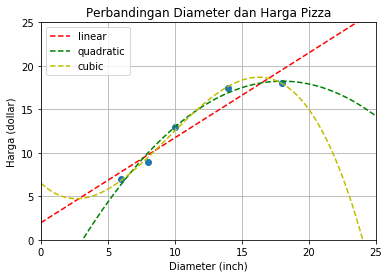

In [29]:
# Code 10

# Training Set
plt.scatter(X_train, y_train)

# Linear
model = LinearRegression()
model.fit(X_train, y_train)
X_vis = np.linspace(0, 25, 100).reshape(-1, 1)
y_vis = model.predict(X_vis)
plt.plot(X_vis, y_vis, '--r', label='linear')

# Quadratic
quadratic_feature = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic_feature.fit_transform(X_train)
model = LinearRegression()
model.fit(X_train_quadratic, y_train)
X_vis_quadratic = quadratic_feature.transform(X_vis)
y_vis = model.predict(X_vis_quadratic)
plt.plot(X_vis, y_vis, '--g', label='quadratic')

# Cubic
cubic_feature = PolynomialFeatures(degree=3)
X_train_cubic = cubic_feature.fit_transform(X_train)
model = LinearRegression()
model.fit(X_train_cubic, y_train)
X_vis_cubic = cubic_feature.transform(X_vis)
y_vis = model.predict(X_vis_cubic)
plt.plot(X_vis, y_vis, '--y', label='cubic')

plt.title('Perbandingan Diameter dan Harga Pizza')
plt.xlabel('Diameter (inch)')
plt.ylabel('Harga (dollar)')
plt.legend()
plt.xlim(0, 25)
plt.ylim(0, 25)
plt.grid(True)
plt.show()

Alur berpikir code 10 :

Training Set :
- Pertama-tama kita panggil terlebih dahulu "plt.scatter(X_train, y_train)" artinya disini kita akan melakukan plotting dataset yang hasil plottingnya berupa kelima data point atau kelima titik biru (lihat pada hasil code 10).

Linear :
- Lalu berikutnya kita akan membentuk model simple linear regression.
- Pertama-tama kita akan bentuk objek modelnya dengan memanggil "LinearRegression()" yang kita tampung kedalam variabel "model".
- Lalu selanjutnya, modelnya akan kita training dengan menggunakan "X_train" dan "y_train".
- Berikutnya disini kita akan menyiapkan 100 data point dengan jangkauan 0 - 25. Lalu nilai dat point ini sebelum ditampung kedalam variabel "X_vis" akan kita reshape denganparameter (-1, 1).
- Selanjutnya nilai yang ditampung dalam variabel "X_vis" tersebut akan kita gunakan sebagai features untuk melakukan prediksi dengan memanggil "model.predict(X_vis)" yang kita tampung kedalam variabel "y_vis".
- Lalu berikutnya, hasil prediksi tersebut akan kita tampilkan secara visual dengan memanggil "plt.plot(X_vis, y_vis, '--r', label='linear')" yang akan menghasilkan garis merah putus-putus (lihat pada hasil code 10).
- Garis merah tersebut merepresentasikan model simple linear regression yang terbentuk.

Quadratic :
- Lalu berikutnya kita akan bandingkan dengan quadratic. Perbedaannya sebenarnya terletak hanya pada penerapan point polynomial feature dengan degree atau derajat 2.
- Pertama kita bentuk terlebih dahulu objeknya dengan memanggil "PolynomialFeatures(degree=2)" yang akan kita tampug kedalam variabel "quadratic_feature".
- Selanjutnya kita akan menggunaka objek "qudratic_feature" tersebut, untuk melakukan fit.transform terhadap nilai dari "X_train" yang hasilnya akan kita tampung kedalam variabel "X_train_quadratic".
- Lalu tahapan berikutnya, kita akan membentuk objek modelnya yang kita tampung kedalam variabel "model".
- Dan selanjutnya kita akan proses training terhadap model kita. Hanya saja disini, modelnya akan kita training dengan menggunakan features yang sudah kita tranformasikan kedalam quadratic polynomial. Oleh karenanya, kita panggil "(X_train_quadratic, y_train)".
- Berikutnya nilai "X_vis" nya juga sama, akan kita transformasikan menjadi quadratic polynomial yang selanjutnya kita akan tampung kedalam variabel "X_vis_quadratic".
- Lalu nilai "X_vis_quadratic tersebut akan kita gunakan untuk mealkukan prediksi.
- Selanjutnya hasil prediksi tersebut akan kita plotting dengan memanggil "plt.plot(X_vis, y_vis, '--g', label='quadratic')" (lihat pada code hasil code 10 garis putus-putus berwarna hijau).

Cubic :
- Perbedaan cubic dengan yang lain yaitu sewaktu kita membentuk objek polynomial features, kita menyertakan degree nya adalah 3.
- Lalu untuk proses berikutnya sama persis dengan proses linear dan quadratic.
- Untuk cubic polynomial regression disini, akan kita plotting sebagai "--y" artinya kita akan ploting sebagai garis putus-putus berwarna yellow atau kuning lalu kita menyertakan label "cubic" (lihat pada hasil code 10 garis putus-putus berwarna kuning).

Untuk pembelajaran lebih lengkapnya, jangan lupa kunjungi channel youtube Indonesia Belajar pada link berikut : https://www.youtube.com/watch?v=nWJUJenAyB8 dan jangan lupa like, comment, dan share.

# "Banyak Belajar, Biar Bisa Bantu Bantu Banyak Orang"

Written By : Clarence Code Pianist